# Description
<b> An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.
Fields

> The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: 50K
Number of attributes: 14
-- These are the demographics and other features to describe a person
We can explore the possibility in predicting income level based on the individual’s personal information.

>Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html
The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html


In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data and performing basic pandas operations

In [4]:
df=pd.read_csv('adult.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [9]:
df.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
df.shape

(48842, 15)

In [12]:
df.isnull()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Univariate Analysis 

<AxesSubplot:xlabel='gender', ylabel='count'>

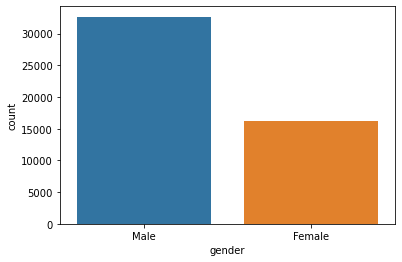

In [13]:
sns.countplot(x=df['gender'])

> there are more number of men are employed or working than women.         
while 30,000+ men are working,only 15,000 women are working

<AxesSubplot:xlabel='age'>

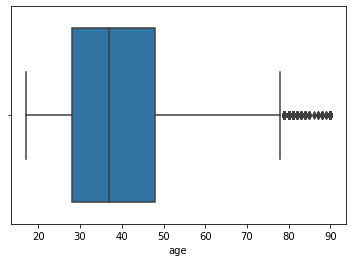

In [14]:
sns.boxplot(x=df['age'])

> the mean age lies between 35 and 40
i.e the mean is 38.64358543876172.
people with age >58 cannot work as age limit for retirement is 58 in india
here we can see max age of 90..thus it is an outlier

In [15]:
print(df['age'].mean())
print(df['age'].min())
print(df['age'].max())

38.64358543876172
17
90


In [16]:
print(type(df['age']))
age=pd.DataFrame(df['age'])

<class 'pandas.core.series.Series'>


<AxesSubplot:xlabel='hours-per-week'>

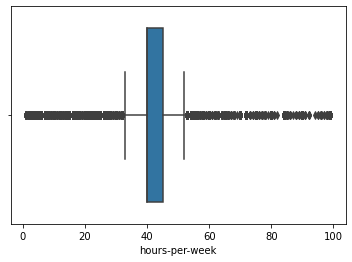

In [17]:
sns.boxplot(x=df['hours-per-week'])

In [18]:
print(df['hours-per-week'].mean())
print(df['hours-per-week'].min())
print(df['hours-per-week'].max())

40.422382375824085
1
99


> we can see a lot of outliers in this column
* the mean of hours per week is between 40 and 42

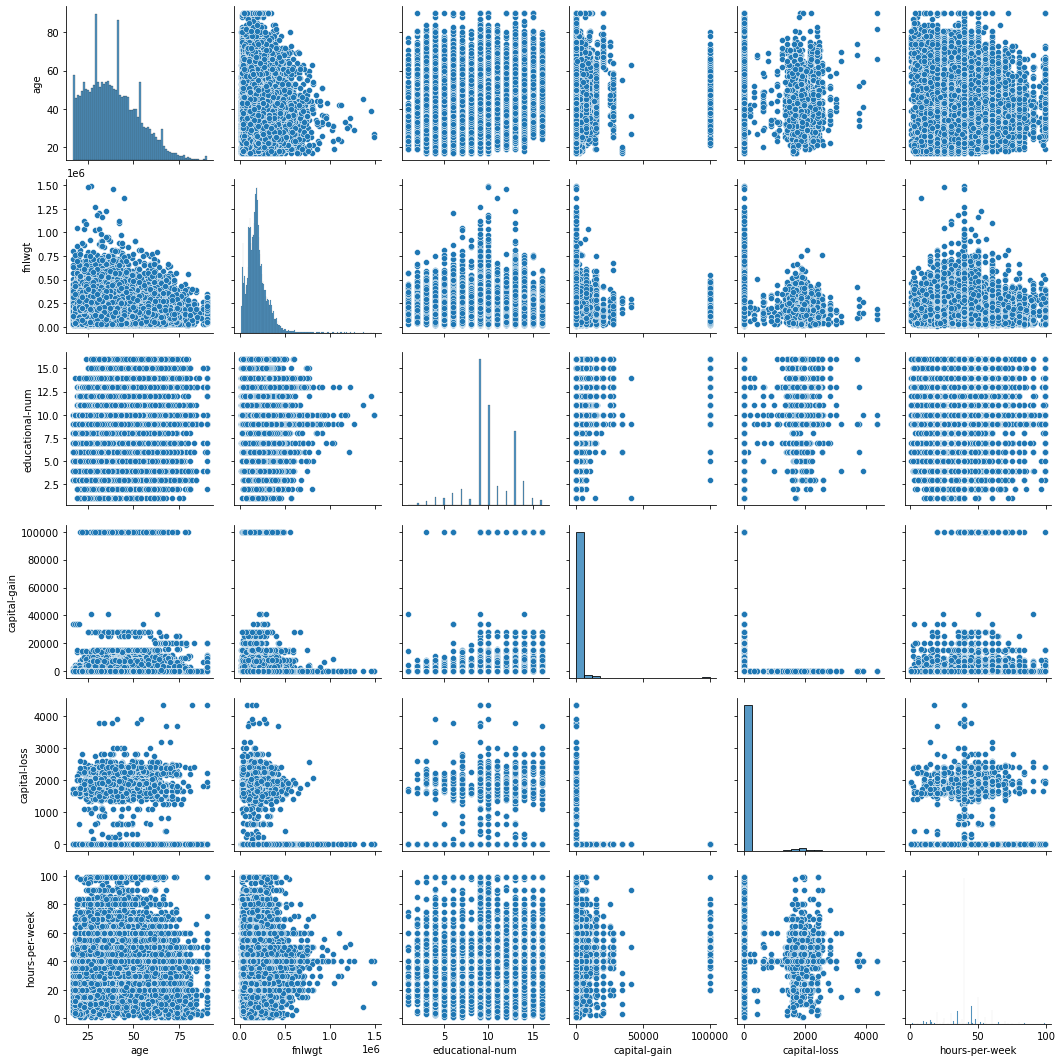

In [19]:
sns.pairplot(df)

In [20]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<AxesSubplot:xlabel='native-country', ylabel='Count'>

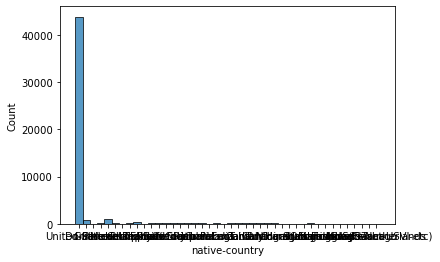

In [21]:
sns.histplot(x=df['native-country'])

In [22]:
df=pd.DataFrame(df)

In [23]:
type(df)

pandas.core.frame.DataFrame

# understanding various inner categories or types in a column

In [24]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [25]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [26]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [27]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

# outlier treatment

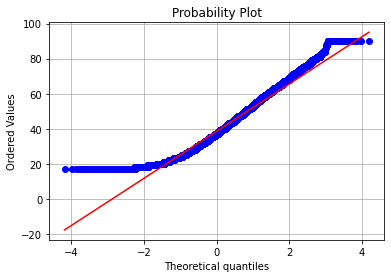

In [28]:
from scipy import stats
stats.probplot(df['age'], dist="norm", plot=plt)
plt.grid()

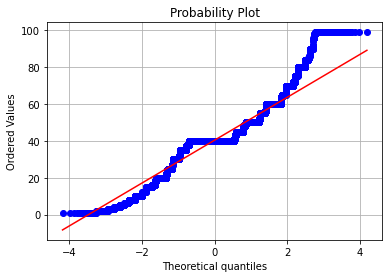

In [29]:
stats.probplot(df['hours-per-week'], dist="norm", plot=plt)
plt.grid()

> a lot of outliers are present in hours-per-week column

In [30]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['age'])

Outliers: [80, 90, 80, 81, 82, 83, 81, 85, 80, 90, 81, 84, 81, 89, 81, 83, 81, 82, 80, 90, 81, 83, 80, 90, 90, 84, 80, 80, 80, 81, 90, 85, 90, 81, 81, 80, 80, 81, 80, 88, 87, 90, 83, 80, 90, 81, 81, 90, 82, 90, 87, 81, 88, 80, 81, 80, 81, 90, 88, 89, 84, 80, 80, 83, 81, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 81, 80, 83, 90, 90, 81, 90, 90, 80, 90, 90, 84, 90, 80, 90, 81, 83, 84, 81, 85, 82, 80, 90, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 90, 82, 81, 90, 84, 81, 82, 81, 80, 90, 80, 84, 82, 90, 84, 90, 83, 81, 80, 80, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 80, 82, 85, 80, 90, 81, 80, 81, 82, 88, 90, 82, 88, 84, 83, 86, 90, 90, 82, 83, 81, 90, 80, 81, 84, 84, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


In [31]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df['hours-per-week'])

Outliers: [90, 84, 80, 84, 80, 99, 80, 80, 96, 90, 3, 1, 99, 80, 80, 84, 99, 99, 2, 2, 78, 80, 99, 84, 80, 3, 80, 80, 80, 99, 92, 3, 80, 84, 99, 80, 84, 85, 1, 99, 2, 84, 80, 99, 98, 80, 84, 96, 99, 80, 90, 78, 84, 80, 90, 80, 86, 80, 84, 80, 99, 80, 85, 80, 80, 80, 80, 3, 2, 80, 84, 99, 80, 84, 2, 99, 99, 99, 99, 90, 80, 80, 96, 2, 84, 99, 99, 90, 99, 80, 88, 2, 80, 80, 90, 79, 78, 84, 2, 80, 80, 84, 3, 1, 84, 99, 89, 98, 80, 80, 90, 3, 80, 99, 80, 78, 2, 99, 99, 80, 80, 2, 80, 80, 99, 80, 99, 99, 80, 80, 90, 80, 78, 84, 3, 80, 80, 1, 80, 99, 99, 99, 80, 99, 80, 88, 3, 90, 3, 80, 85, 84, 3, 98, 80, 99, 84, 2, 80, 99, 99, 1, 2, 99, 96, 84, 99, 80, 1, 99, 99, 2, 99, 1, 84, 80, 90, 3, 2, 99, 99, 3, 85, 99, 3, 3, 99, 3, 80, 80, 99, 2, 99, 99, 80, 80, 99, 99, 2, 80, 2, 80, 86, 80, 3, 80, 2, 84, 3, 80, 80, 3, 84, 99, 80, 99, 80, 84, 99, 2, 80, 3, 80, 2, 80, 99, 2, 80, 90, 84, 92, 80, 80, 99, 80, 3, 84, 84, 80, 90, 80, 80, 80, 2, 2, 1, 98, 80, 80, 80, 99, 2, 1, 80, 80, 99, 80, 1, 80, 78, 90,

In [32]:
# finding outliers using quantile

In [33]:
max=df['age'].quantile(0.95)
max

63.0

In [34]:
df[df['age']>max]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
40,65,Private,136384,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
77,69,Self-emp-inc,174379,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
48806,81,?,120478,Assoc-voc,11,Divorced,?,Unmarried,White,Female,0,0,1,?,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48823,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K


In [35]:
min=df['age'].quantile(0.02)
min

18.0

In [36]:
df[df['age']<min]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
38,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
75,17,?,165361,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
402,17,Private,40299,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States,<=50K
675,17,Private,190941,10th,6,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
765,17,?,143331,11th,7,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,17,?,256173,10th,6,Never-married,?,Own-child,White,Female,0,0,15,United-States,<=50K
48145,17,Private,214787,12th,8,Never-married,Adm-clerical,Own-child,White,Female,0,0,25,United-States,<=50K
48240,17,Private,24090,HS-grad,9,Never-married,Exec-managerial,Own-child,White,Female,0,0,35,United-States,<=50K
48563,17,Private,311907,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K


In [37]:
df2=df[(df['age']<max) & (df['age']>min)]

In [38]:
df2.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,44623.000000,4.462300e+04,44623.000000,44623.000000,44623.000000,44623.000000
mean,37.448558,1.907044e+05,10.201667,1067.838155,87.815499,41.519015
std,11.421021,1.060608e+05,2.505107,7474.837700,401.889441,11.521037
min,19.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.180010e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.794130e+05,10.000000,0.000000,0.000000,40.000000
75%,46.000000,2.388040e+05,13.000000,0.000000,0.000000,45.000000
max,62.000000,1.490400e+06,16.000000,99999.000000,3900.000000,99.000000


<AxesSubplot:xlabel='age'>

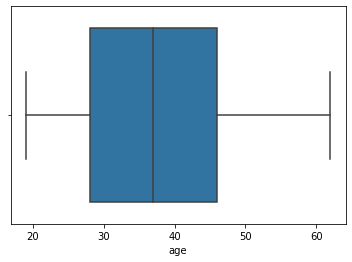

In [39]:
sns.boxplot(x=df2['age'])

In [40]:
df.drop(columns='fnlwgt',axis=0,inplace=True)

In [41]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [42]:
from scipy.stats import pearsonr
corr,_=pearsonr(df['age'],df['hours-per-week'])

In [43]:
corr

0.07155833852698291

In [44]:
corr,_=pearsonr(df['age'],df['educational-num'])

In [45]:
corr

0.030940375874514012

In [46]:
corr,_=pearsonr(df['capital-gain'],df['capital-loss'])

In [47]:
corr

-0.031440770647463645

In [48]:
df2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [49]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

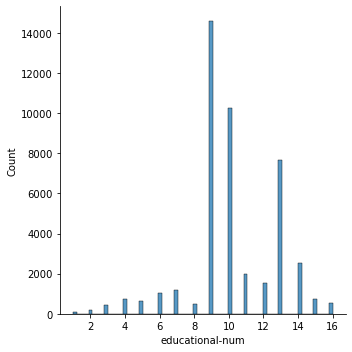

In [50]:
sns.displot(x=df2['educational-num'])

<AxesSubplot:xlabel='educational-num'>

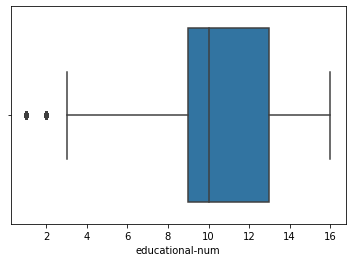

In [51]:
sns.boxplot(x=df2['educational-num'])

In [52]:
max1=df2['educational-num'].quantile(0.99)

In [53]:
max1

16.0

In [54]:
min1=df2['educational-num'].quantile(0.01)
min1

3.0

In [55]:
df2[df2['educational-num']<min]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [56]:
df3=df2[(df2['educational-num']<max1) & (df2['educational-num']>min1)]

In [57]:
df3

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<AxesSubplot:xlabel='educational-num'>

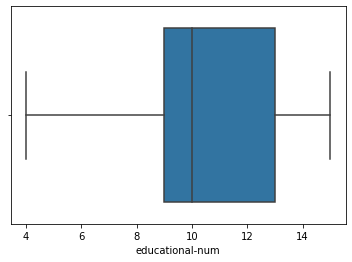

In [58]:
sns.boxplot(x=df3['educational-num'])

In [59]:
df3.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,43373.000000,4.337300e+04,43373.000000,43373.000000,43373.000000,43373.000000
mean,37.303092,1.899881e+05,10.258248,1024.029004,86.633067,41.469301
std,11.393506,1.057759e+05,2.247742,7224.189641,398.771945,11.479377
min,19.000000,1.228500e+04,4.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,36.000000,1.786490e+05,10.000000,0.000000,0.000000,40.000000
75%,46.000000,2.377200e+05,13.000000,0.000000,0.000000,45.000000
max,62.000000,1.490400e+06,15.000000,99999.000000,3900.000000,99.000000


In [60]:
np.abs(df3['capital-gain'])

0            0
1            0
2            0
3         7688
5            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital-gain, Length: 43373, dtype: int64

C:\Users\tulis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

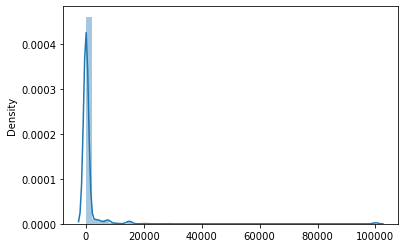

In [61]:
sns.distplot(x=df['capital-gain'])

# conclusion of EDA

> There are many outliers in age, as the age limit for retirement is only for 53+ age but here we find people above age 90 or 80 are working.thus the outliers are removed using the quantile.

# feature transformation
> in this we are using standard scaler to sacle the numerical values and getting dummies to resolve categories in a column

In [62]:
df3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [64]:
df[['age','educational-num','hours-per-week']]=scaler.fit_transform(df[['age','educational-num','hours-per-week']])

In [65]:
df[['age','educational-num','hours-per-week']]

,age,educational-num,hours-per-week
0,0.109589,0.400000,0.397959
1,0.287671,0.533333,0.500000
2,0.150685,0.733333,0.397959
3,0.369863,0.600000,0.397959
4,0.013699,0.600000,0.295918
...,...,...,...
48837,0.136986,0.733333,0.377551
48838,0.315068,0.533333,0.397959
48839,0.561644,0.533333,0.397959
48840,0.068493,0.533333,0.193878


In [66]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [98]:
df['gender']
sex=pd.get_dummies(df['gender'])
sex

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
48837,1,0
48838,0,1
48839,1,0
48840,0,1


In [99]:
sex1=sex.drop('Female',axis='columns')

In [100]:
sex1

,Male
0,1
1,1
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,1


In [87]:
races=pd.get_dummies(df[['race']])
races

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
48837,0,0,0,0,1
48838,0,0,0,0,1
48839,0,0,0,0,1
48840,0,0,0,0,1


In [89]:
relatn=pd.get_dummies(df[['relationship']])
relatn

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
48837,0,0,0,0,0,1
48838,1,0,0,0,0,0
48839,0,0,0,0,1,0
48840,0,0,0,1,0,0


In [90]:
mstats=pd.get_dummies(df[['marital-status']])
mstats

,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0
48838,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,1
48840,0,0,0,0,1,0,0


In [91]:
edu=pd.get_dummies(df[['education']])
edu

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [102]:
inc=pd.get_dummies(df[['income']])
inc1=inc.drop('income_<=50K',axis='columns')
inc1

,income_>50K
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [73]:
wclass=pd.get_dummies(df[['workclass']])

In [74]:
country=pd.get_dummies(df[['native-country']])

In [75]:
occu=pd.get_dummies(df[['occupation']])

In [79]:
df3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [83]:
k=df3
k=df3.drop(columns=['race','relationship','marital-status','education','income','workclass','occupation','gender','capital-gain','capital-loss','native-country','fnlwgt'])

In [84]:
k

,age,educational-num,hours-per-week
0,25,7,40
1,38,9,50
2,28,12,40
3,44,10,40
5,34,6,30
...,...,...,...
48837,27,12,38
48838,40,9,40
48839,58,9,40
48840,22,9,20


In [104]:
m=k.drop('educational-num',axis='columns')

In [105]:
data=pd.concat([m,sex1,inc1],axis='columns')

In [123]:
data1=data.dropna()
data1.head()

,age,hours-per-week,Male,income_>50K
0,25.0,40.0,1,0
1,38.0,50.0,1,0
2,28.0,40.0,1,1
3,44.0,40.0,1,1
5,34.0,30.0,1,0


In [127]:
x=data1[['age','hours-per-week','Male']]

In [128]:
y=data1['income_>50K']

In [129]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

LinearRegression()

In [132]:
print(reg.predict([[25,40,1]]))
print(reg.score(x,y))

[0.17474462]
0.12916415189574282


In [134]:
from sklearn.linear_model import LogisticRegression
lgreg=LogisticRegression()
lgreg.fit(x,y)

LogisticRegression()

In [135]:
print(lgreg.predict([[25,40,1]]))
print(lgreg.score(x,y))

[0]
0.7513891130426763


# Conclusion

* The accuracy score is more incase of Logistic regression i.e 75%.
* But the accuracy score of Linear regression model was very less..thus Logistic regression works better for categorical data, where the income is a categorical value i.e 0 or 1